# Random Generating Matrices Digital Nets Demo

Binary *digital nets* generated by QMCPy now support an integer as input, which outputs a totally randomized generating matrix and produces a randomized digital net. Stay tuned to see how it performs!

$\newcommand{\FredComment}[1]{\color{blue}{\text{[Fred:  #1]}}}$

In [3]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt
import time

Here are some parameters to reproduce the randomness

In [4]:
randseed = 10 #seed for reproduction
m_max = 32 #integer input for generating matrix

### Getting started

Syntax reference for Digital Nets. The important input parameters for a `qp.DigitalNetB2` object are
`generating_matrices`,`dimension`,`seed`, and `randomize`.

An integer input for `generating_matrices` should be larger than 1; passing in an integer $M$ results in randomized generating matrices of shape $m_{max} =$ `generating_matrices` $ \times \, t_{max} = m_{max}$, containing integral elements $[0,2^{t_{max}})$. <span style="color:blue"> $\FredComment{Do not understand this.}$

`randomize` is set to True (LMS scrambling and digital shifts) by default. Other options include 
* `LMS_DS`: linear matrix scramble with digital shift
* `LMS`: linear matrix scramble only
* `DS`: digital shift only
* `false`: none of the above


Here is a digital net with totally random generator matrices and no digital shift

In [5]:
dnet = qp.DigitalNetB2(generating_matrices=m_max, seed=randseed, dimension = 5, randomize=False)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       0
    graycode        0
    entropy         10
    spawn_key       ()
[[0.    0.    0.    0.    0.   ]
 [0.5   0.5   0.5   0.5   0.5  ]
 [0.25  0.75  0.25  0.25  0.75 ]
 [0.75  0.25  0.75  0.75  0.25 ]
 [0.875 0.125 0.125 0.125 0.375]
 [0.375 0.625 0.625 0.625 0.875]
 [0.625 0.875 0.375 0.375 0.625]
 [0.125 0.375 0.875 0.875 0.125]]


Here is a digital net with totally random generator matrices and a digital shift $\FredComment{Do not see the digital shift.}$

In [4]:
dnet = qp.DigitalNetB2(generating_matrices=4, seed=randseed, dimension = 2, randomize=False)
print(dnet)
x = dnet.gen_samples(8, warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       0
    graycode        0
    entropy         5
    spawn_key       ()
[[0.    0.   ]
 [0.5   0.5  ]
 [0.25  0.25 ]
 [0.75  0.75 ]
 [0.625 0.375]
 [0.125 0.875]
 [0.875 0.125]
 [0.375 0.625]]


## Comparison between randomized digital net and default digital net 

In [5]:
tot_random_dnet = qp.DigitalNetB2(dimension = 2, generating_matrices= m_max, seed = randseed) #Totally randomized Digital Net
default_dnet= qp.DigitalNetB2(dimension = 2, seed = randseed) #Default Digital Net in comparison


Below are the points generated by a totally randomized digital net versus a default digital net.

(<Figure size 500x500 with 1 Axes>,
 array([[<AxesSubplot:xlabel='$x_{i0}$', ylabel='$x_{i1}$'>]], dtype=object))

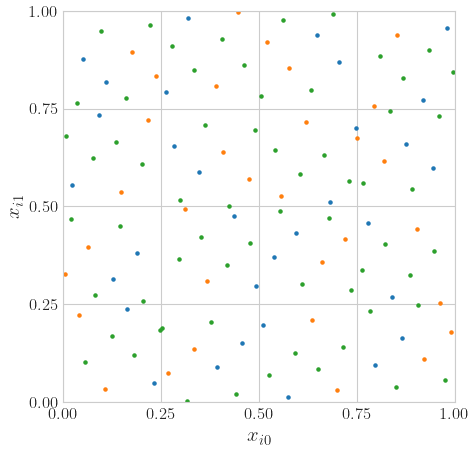

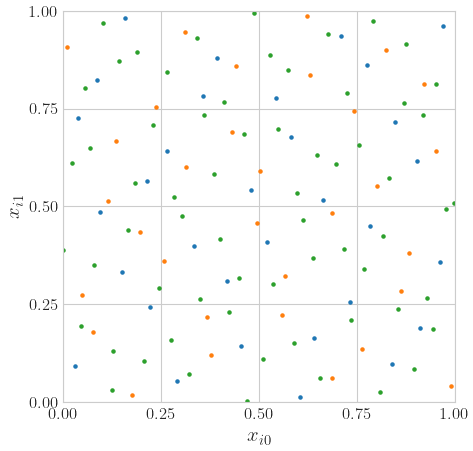

In [6]:
num_samples = [32,64,128] 
qp.plot_proj(num_samples,tot_random_dnet,math_ind=True) #plot method for qmpcy
qp.plot_proj(num_samples,default_dnet,math_ind=True) 

### Bitwize representation of generating matrices

Switching `_verbose = True` prints out the bitwise representation of the randomized generating matrix created by the integer input and the linear scrambling matrix.  

In [9]:
m_max = 4
dnet = qp.DigitalNetB2(dimension=2,generating_matrices=m_max,_verbose = True)


	c[dvec[0]]
		1 1 1 1 
		0 1 1 0 
		0 0 1 0 
		0 0 0 1 
		
	c[dvec[1]]
		1 1 1 0 
		0 1 0 1 
		0 0 1 1 
		0 0 0 1 
		c (generating_matrix)
s (scrambling_matrix)

	s[dvec[0]]
		1 0 0 0 
		1 1 0 0 
		0 0 1 0 
		1 1 1 1 
		
	s[dvec[1]]
		1 0 0 0 
		1 1 0 0 
		1 0 1 0 
		0 0 0 1 
		

As is evident, all generating matrices are upper triangular, while all linear scrambling matrices are lower triangular. 

## Integration

### Sample Integration  

In [7]:
d = 2
tol = 1e-3
m_max = 32
dnet = qp.DigitalNetB2(dimension = d, generating_matrices= m_max)
gaussian_net = qp.Gaussian(dnet,mean = 0, covariance=1/2)
dnetcomp = qp.DigitalNetB2(d)
gaussian_net_comp = qp.Gaussian(dnetcomp,mean = 0,covariance = 1/2)


In [8]:
solution_random,data_random = qp.CubQMCNetG(qp.Keister(gaussian_net),abs_tol = tol).integrate()
print("Integration data from a randomized digital net")
print(data_random)


Integration data from a randomized digital net
LDTransformData (AccumulateData Object)
    solution        1.808
    comb_bound_low  1.807
    comb_bound_high 1.808
    comb_flags      1
    n_total         2^(13)
    n               2^(13)
    time_integrate  0.165
CubQMCNetG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
DigitalNetB2 (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       1
    graycode        0
    entropy         336759967948520454706971317230546836156
    spawn_key       ()


In [10]:
answer = qp.Keister(dnet).exact_integ(2)
print(f"Difference between randomized digital net results and exact answer {0}".format(abs(answer-solution_random)))
#REALLY????????

Difference between randomized digital net results and exact answer 0


### Error comparison between mean of means and median of means  $\FredComment{You need some more explanation of what is going on.}$

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


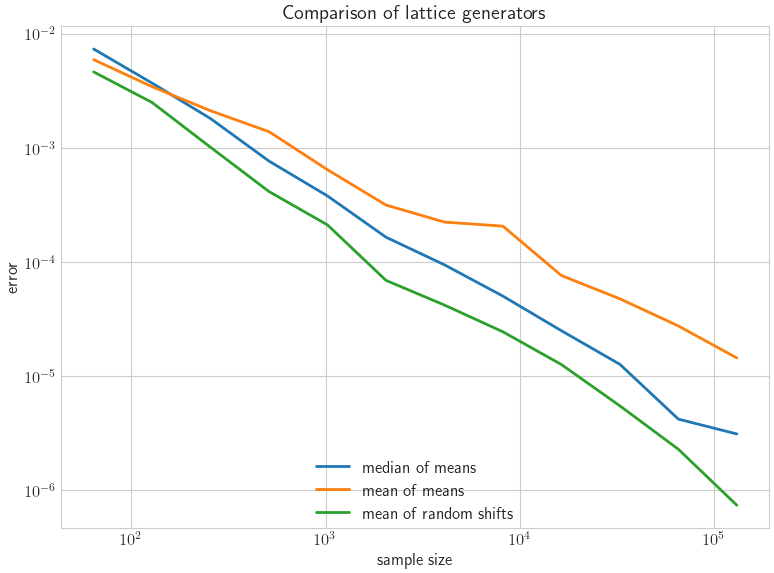

In [15]:
#mean of means vs. median of means

d = 2
N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
error_mean_onegen = np.zeros(N_max - N_min) 
for i in range(num_trials):
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        dnet = qp.DigitalNetB2(generating_matrices = m_max,dimension=d)
        keister = qp.Keister(dnet)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.DigitalNetB2(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)

error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.loglog(N_list,error_mean_onegen,label = "mean of random shifts")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of lattice generators")
plt.legend()
plt.savefig("./meanvsmedian.png")

